In [382]:
import xarray as xr
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL,'en_US')
dataset = xr.open_dataset('MiningProcess_Flotation_Plant_Database.h5', engine = 'h5netcdf')
df = dataset.to_pandas()


In [383]:

df = df.resample('1h').mean()


In [384]:
df_input_feed = df.iloc[:,:2]
df_process_variables = df.iloc[:,2:-2]
df_output_feed = df.iloc[:,-2:]

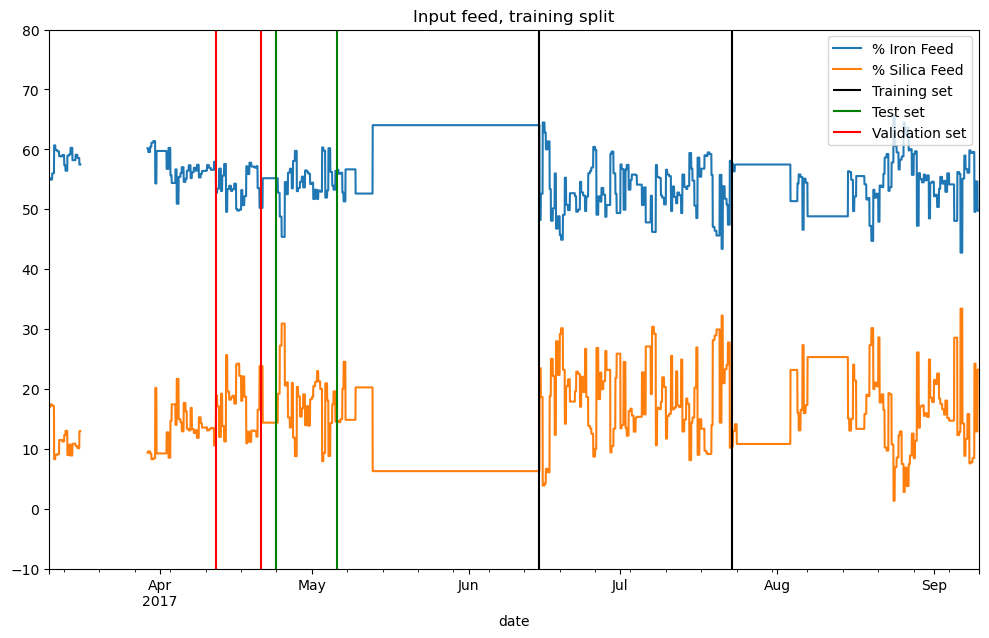

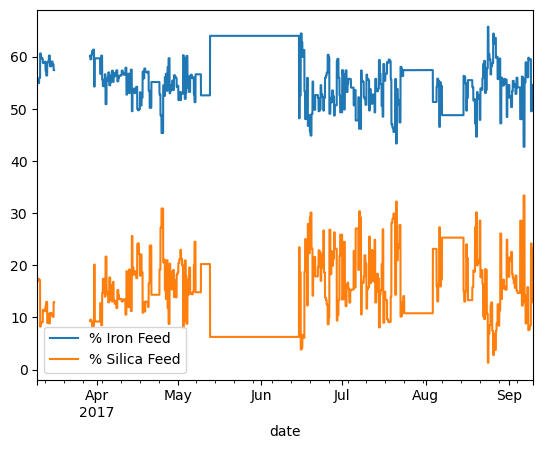

In [385]:
from matplotlib import pyplot as plt

df_input_feed.plot(figsize=(12,7))
plt.vlines('20170615',-10,80,colors='k',label='Training set')
plt.vlines('20170723',-10,80,colors='k')
plt.ylim(-10,80)
plt.title('Input feed, training split')
plt.legend()

plt.vlines(['20170424','20170506'],-10,80,colors='g',label='Test set')
plt.vlines(['20170412','20170421'],-10,80,colors='r',label='Validation set')

plt.legend(loc=1)
df_input_feed.plot()
# df_output_feed.plot()

df_train = df['20170615':'20170723']
df_test = df['20170424':'20170506']
df_validation = df['20170424':'20170506']

Starch Flow                       2
Amina Flow                        2
Ore Pulp Flow                     2
Ore Pulp pH                      11
Ore Pulp Density                  3
Flotation Column 01 Air Flow      7
Flotation Column 02 Air Flow      7
Flotation Column 03 Air Flow      7
Flotation Column 04 Air Flow    460
Flotation Column 05 Air Flow    460
Flotation Column 06 Air Flow      8
Flotation Column 07 Air Flow      8
Flotation Column 01 Level         4
Flotation Column 02 Level         2
Flotation Column 03 Level         2
Flotation Column 04 Level         2
Flotation Column 05 Level         3
Flotation Column 06 Level         2
Flotation Column 07 Level         2
dtype: int64

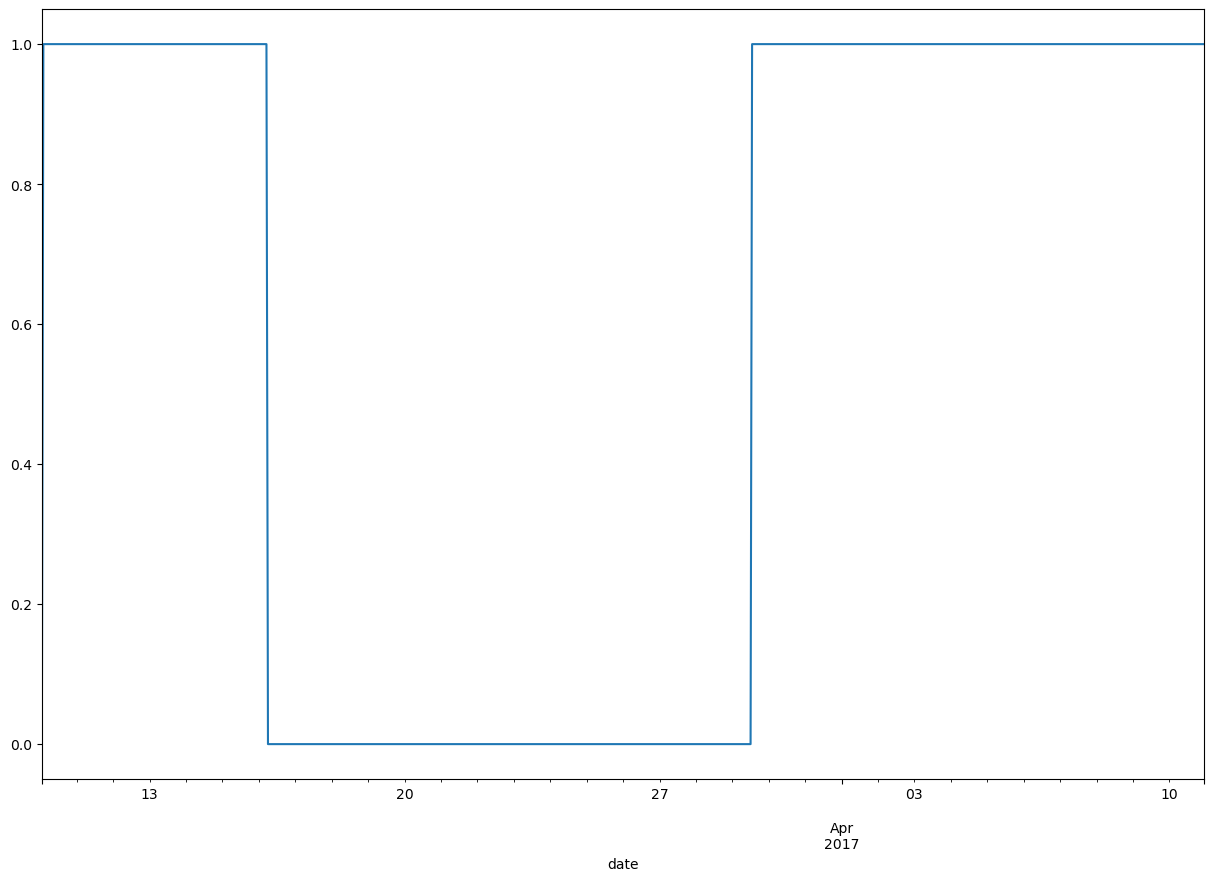

In [386]:
from matplotlib import pyplot as plt


df_missing = df_process_variables == df_process_variables.shift()

(df_missing.loc[:'20170410','Flotation Column 05 Air Flow']*1).plot(figsize=(15,10))

df_missing.sum()


In [387]:

df_train = df['20170615':'20170723']
df_test = df['20170424':'20170506']
df_validation = df['20170412':'20170421']

In [388]:
## Normalization here:

In [389]:
# Save each DataFrame into the HDF5 file under different keys
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split.h5') as store:
    store.put('train_data', df_train)
    store.put('test_data', df_test)
    store.put('validation_data', df_validation)


In [390]:
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split.h5') as store:
    df1_loaded = store.get('train_data')
    df2_loaded = store.get('test_data')
    df3_loaded = store.get('validation_data')

print(df1_loaded)
print(df2_loaded)
print(df3_loaded)

                     % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-06-15 00:00:00        64.03           6.26  3480.292789  449.924811   
2017-06-15 01:00:00        48.21          23.46  3700.329333  490.203261   
2017-06-15 02:00:00        48.21          23.46  3040.802142  468.486739   
2017-06-15 03:00:00        48.21          23.46  3133.105842  540.314011   
2017-06-15 04:00:00        48.21          23.46  2477.708153  448.150511   
...                          ...            ...          ...         ...   
2017-07-23 19:00:00        57.44          14.09  2874.076259  537.018194   
2017-07-23 20:00:00        57.44          14.09  2642.701681  501.404761   
2017-07-23 21:00:00        57.44          14.09  2389.803323  491.017589   
2017-07-23 22:00:00        57.44          14.09  3115.936082  484.235017   
2017-07-23 23:00:00        57.44          14.09  3356.331557  425.479100   

           

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  1,  2,  3,  4,  5,
         6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23]),
 [Text(1, 0, '% Iron Feed'),
  Text(2, 0, '% Silica Feed'),
  Text(3, 0, 'Starch Flow'),
  Text(4, 0, 'Amina Flow'),
  Text(5, 0, 'Ore Pulp Flow'),
  Text(6, 0, 'Ore Pulp pH'),
  Text(7, 0, 'Ore Pulp Density'),
  Text(8, 0, 'Flotation Column 01 Air Flow'),
  Text(9, 0, 'Flotation Column 02 Air Flow'),
  Text(10, 0, 'Flotation Column 03 Air Flow'),
  Text(11, 0, 'Flotation Column 04 Air Flow'),
  Text(12, 0, 'Flotation Column 05 Air Flow'),
  Text(13, 0, 'Flotation Column 06 Air Flow'),
  Text(14, 0, 'Flotation Column 07 Air Flow'),
  Text(15, 0, 'Flotation Column 01 Level'),
  Text(16, 0, 'Flotation Column 02 Level'),
  Text(17, 0, 'Flotation Column 03 Level'),
  Text(18, 0

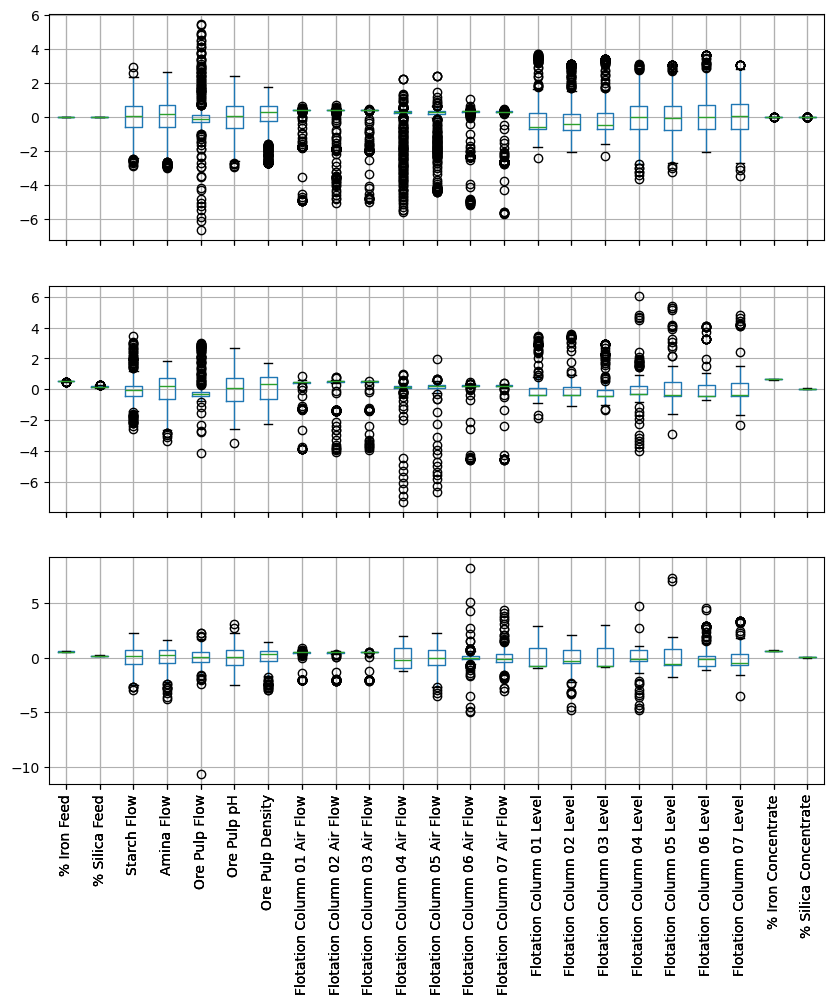

In [444]:
from scipy.stats import zscore

def normalise_dataframe(df):
    df_out = df.copy()
    df_out.iloc[:,:2] = df.iloc[:,:2]/100
    df_out.iloc[:,-2:] = df.iloc[:,-2:]/100
    df_out.iloc[:,2:-2] = zscore(df.iloc[:,2:-2])
    return df_out

fig,axes = plt.subplots(3,1,figsize=(10,10),sharex=True)


normalise_dataframe(df_train).boxplot(ax=axes[0])
normalise_dataframe(df_test).boxplot(ax=axes[1])
normalise_dataframe(df_validation).boxplot(ax=axes[2])

plt.xticks(rotation = 90)


<Axes: xlabel='date'>

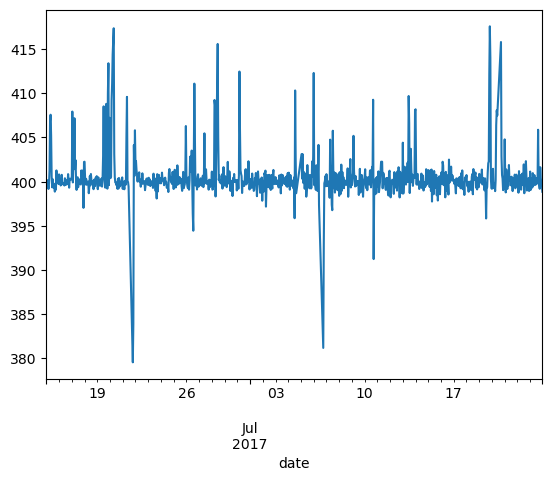

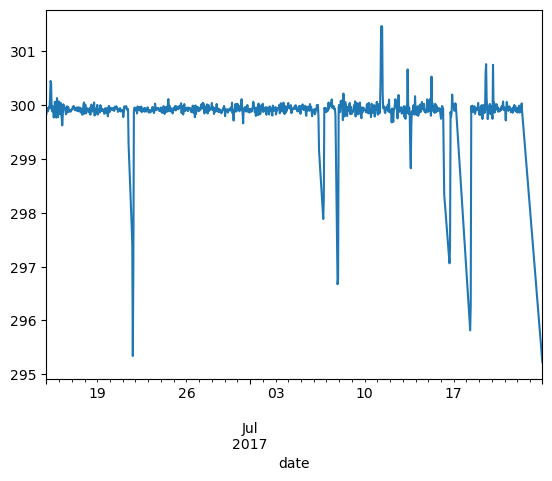

In [409]:
df_train['Ore Pulp Flow'].plot()
plt.figure()
df_train['Flotation Column 04 Air Flow'].plot()

<Axes: xlabel='date'>

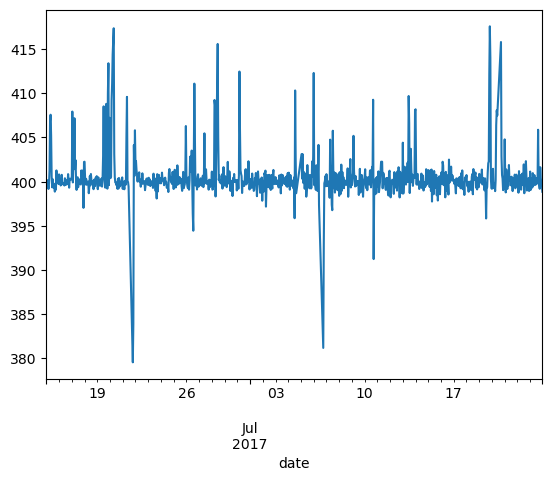

In [392]:
df_train['Ore Pulp Flow'].plot()